In [17]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt



创建数据，实际为y=x^2，加上0.2的偏差作为扰动


In [27]:
x = torch.unsqueeze(torch.linspace(-1, 1, 200), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + x + 0.05*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
# y = 0.2 * x.pow(3) - 0.4 * x.pow(2) + 0.3*x + 0.01 * torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)



绘图 y = x^2

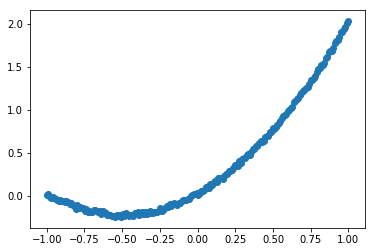

In [28]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

构建回归模型

加上hidden2层，在forward中使用，即形成了1输入，第一层20神经元，第二层20神经元，第三层输出的模型

In [29]:
# 继承torch.nn.Module，需要重写init和forward，forward为前向传播
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        # 继承Net的init
        super(Net, self).__init__()
        # n_feature表示输入维度，n_hidden表示隐藏层输出维度
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        # self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)   # hidden layer2

        # 预测神经层，输入为上一层输出，然后输出结果
        self.tt = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        # x通过self.hidden后输出隐藏层值，通过relu激活函数
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        # x = F.relu(self.hidden2(x))

        # 将上一次的输出作为输出层输入，由于前面已经使用激励函数，所以输出值必定已经给予一定截断，所以在此不需要截断效果
        x = self.tt(x)             # linear output
        return x

# 初始化
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
# 查看net信息
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (tt): Linear(in_features=20, out_features=1, bias=True)
)


定义损失函数和优化器


In [30]:
# optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
# optimizer = torch.optim.Adam(net.parameters(),lr=0.2)
optimizer = torch.optim.RMSprop(net.parameters(), lr=0.01, alpha=0.9)

loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss


开始计算，先预测后算出loss，然后清除梯度（不清除会叠加梯度），反向传播，调优

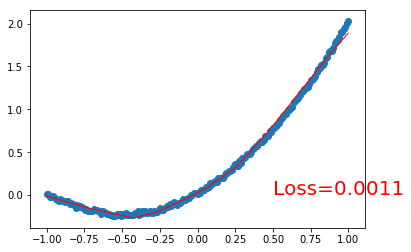

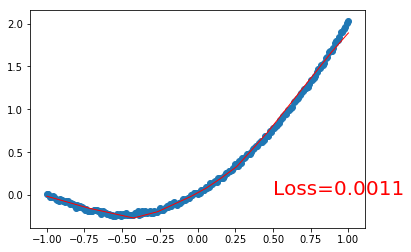

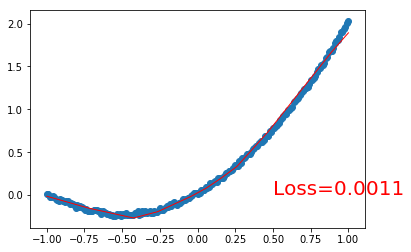

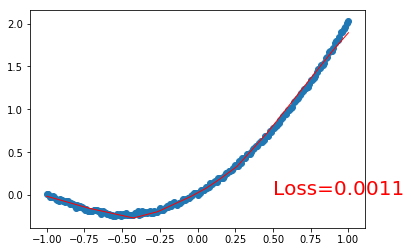

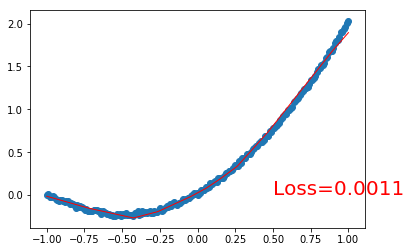

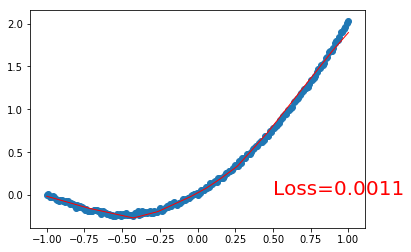

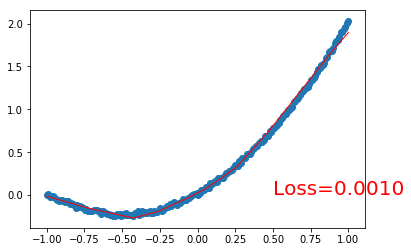

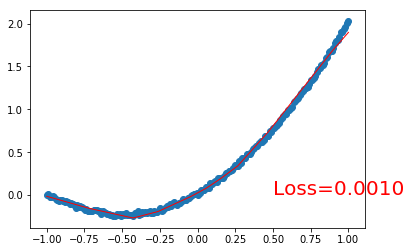

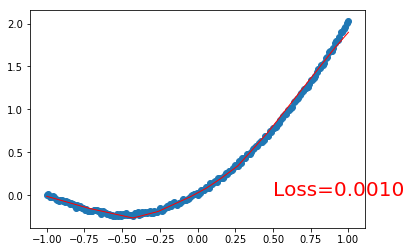

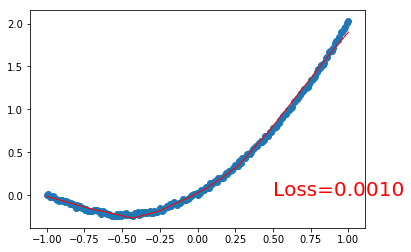

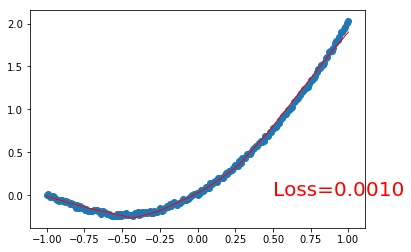

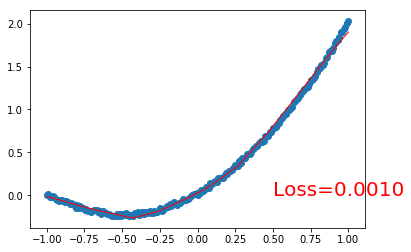

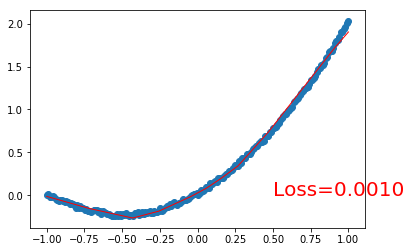

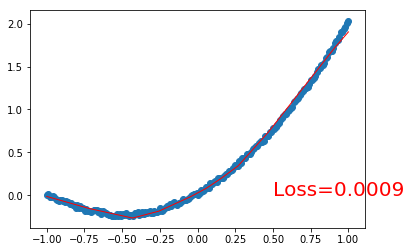

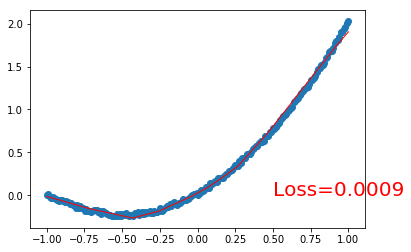

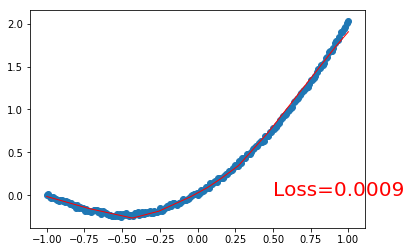

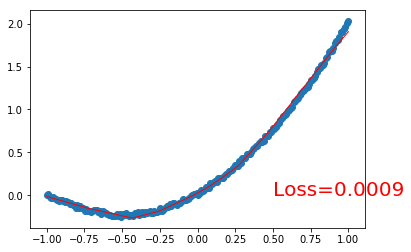

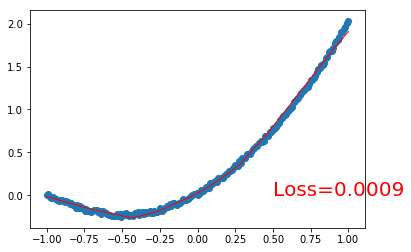

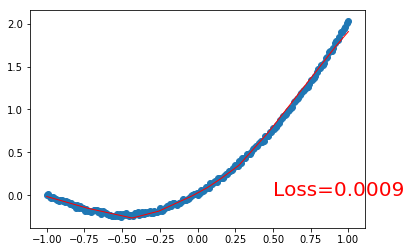

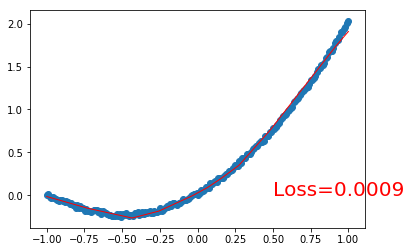

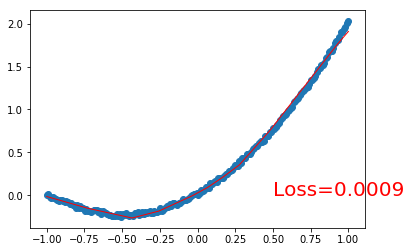

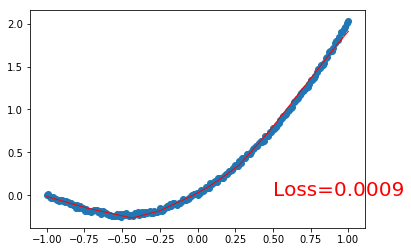

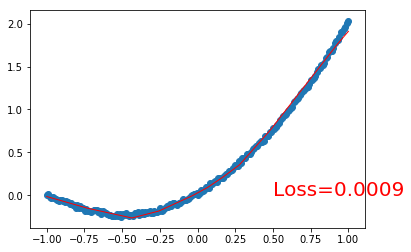

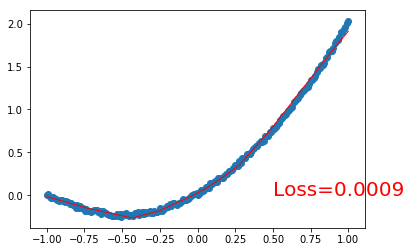

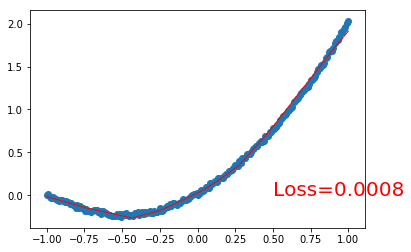

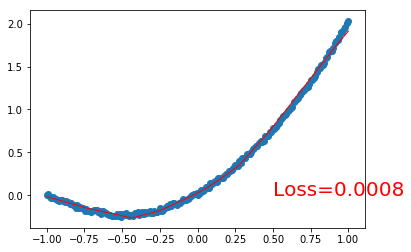

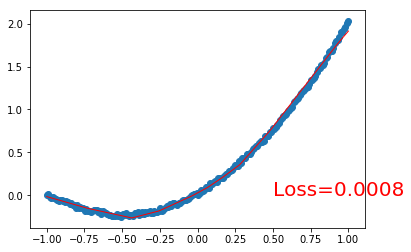

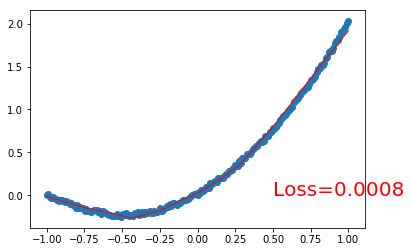

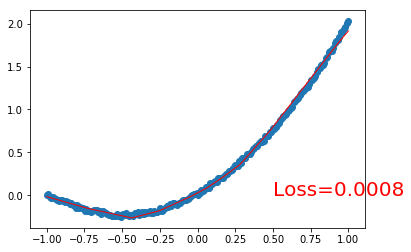

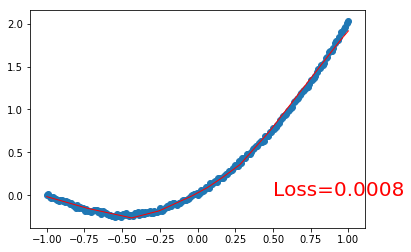

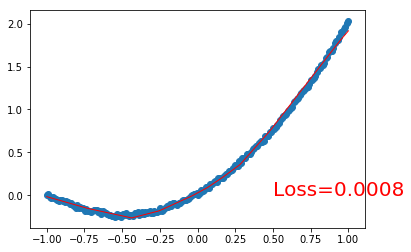

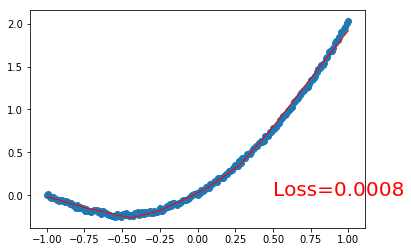

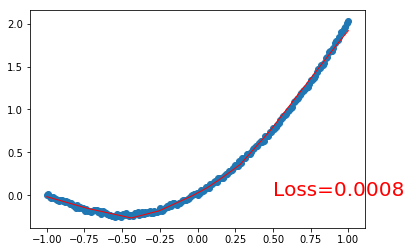

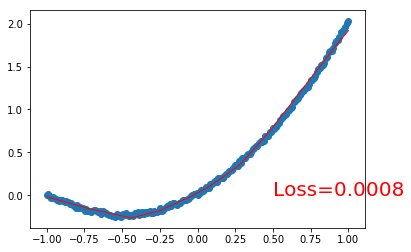

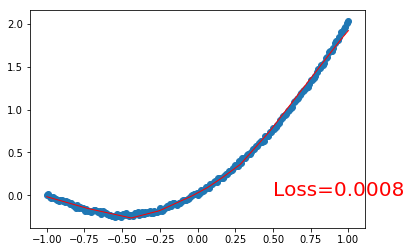

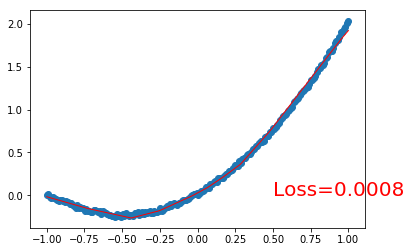

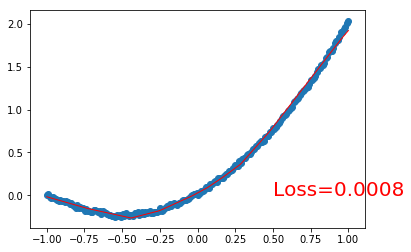

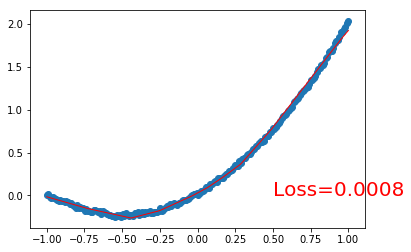

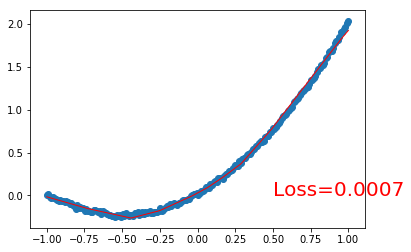

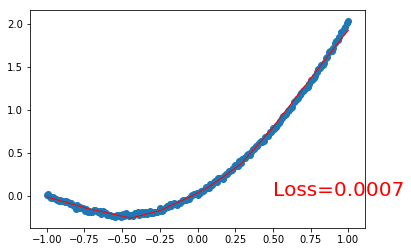

In [37]:
plt.ion()   # something about plotting

for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    # 三个优化步骤，梯度清除，loss反向传播，optimizer以学习效率lr优化梯度
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=1)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()


模型保存


In [36]:
torch.save(net.state_dict(), './mofan_regression.pth')



